In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

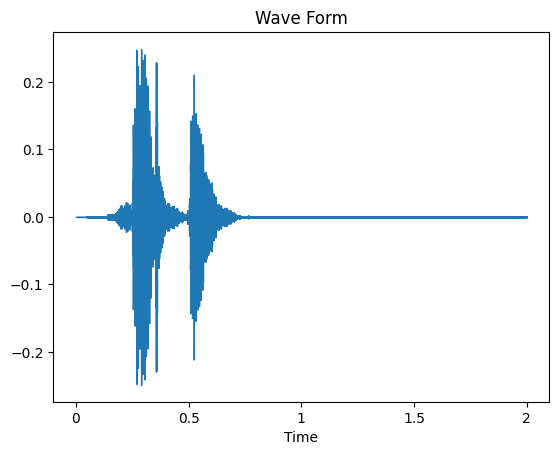

Shape of mfcc: (40, 87)


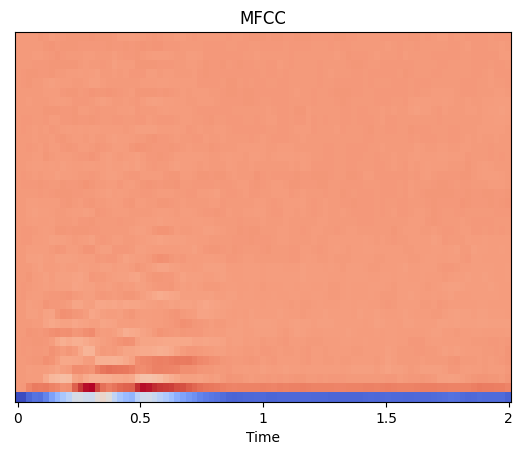

In [2]:
#### LOADING THE VOICE DATA FOR VISUALIZATION ###
walley_sample = "wake_word/10.wav"
data, sample_rate = librosa.load(walley_sample)

##### VISUALIZING WAVE FORM ##
plt.title("Wave Form")
librosa.display.waveshow(data, sr=sample_rate)
plt.show()

##### VISUALIZING MFCC #######
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print("Shape of mfcc:", mfccs.shape)

plt.title("MFCC")
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.show()

In [3]:
##### Doing this for every sample ##

all_data = []

data_path_dict = {
    0: ["other_words/" + file_path for file_path in os.listdir("other_words/")],
    1: ["wake_word/" + file_path for file_path in os.listdir("wake_word/")]
}
# the background_sound/ directory has all sounds which DOES NOT CONTAIN wake word
# the audio_data/ directory has all sound WHICH HAS Wake word

for class_label, list_of_files in data_path_dict.items():
    for single_file in list_of_files:
        audio, sample_rate = librosa.load(single_file) ## Loading file
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40) ## Apllying mfcc
        mfcc_processed = np.mean(mfcc.T, axis=0) ## some pre-processing, to reduce dimension of data
        all_data.append([mfcc_processed, class_label])
    print(f"Info: Succesfully Preprocessed Class Label {class_label}")

df = pd.DataFrame(all_data, columns=["feature", "class_label"])

###### SAVING FOR FUTURE USE ###
df.to_pickle("processed_data/audio_data.csv") # Pickled and save.

Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 1
